# Fidelity test ressults test

In [1]:
import os
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Compute Fidelity
def ABSCosineSimilarityFrobenius(target_matrix, predicted_matrix):
    target_matrix_H = target_matrix.conj().T
    predicted_matrix_H = predicted_matrix.conj().T
    trace_tH_t = np.trace(np.dot(target_matrix_H, target_matrix)).real          # result is REAL
    trace_pH_p = np.trace(np.dot(predicted_matrix_H, predicted_matrix)).real    # result is REAL
    trace_pH_t = np.trace(np.dot(predicted_matrix_H, target_matrix))
    cosine_similarity = trace_pH_t/np.sqrt(trace_tH_t*trace_pH_p)
    cosine_similarity = np.abs(cosine_similarity)   # Take the abs 
    return cosine_similarity

In [3]:
# Compute Fidelity
def FidelityUnitary(target_matrix, predicted_matrix):
    predicted_matrix_H = predicted_matrix.conj().T
    trace_pH_p = np.trace(np.dot(predicted_matrix_H, predicted_matrix)).real    # result is REAL
    trace_pH_t = np.trace(np.dot(predicted_matrix_H, target_matrix))
    cosine_similarity = (np.abs(trace_pH_t))**2/(target_matrix.shape[0]*trace_pH_p)
    return cosine_similarity

In [4]:
# Extract targets and preditions from the simulation directory folder
def extract_targets_preditions_1sim(directory):
    target_tuples = []
    predit_tuples = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)       # Construct the full file path
        if os.path.isfile(file_path):                       # Check if it is a file
            result_sim = np.load(file_path, allow_pickle=True)
            target_tuples.extend([(label, array) for label, array in result_sim if 'target' in label])
            predit_tuples.extend([(label, array) for label, array in result_sim if 'prediction' in label])
    return target_tuples, predit_tuples

In [5]:
# Derive the FIDELITY for all one entire simulation
def remove_until_underscore(s):     # from the end until the first '_'
    parts = s.split('_')
    result = '_'.join(parts[1:])
    return result

def derive_Fidelity_1sim(target_tuples, predit_tuples):
    fidelity = []
    for i in range(len(target_tuples)):
        if remove_until_underscore(target_tuples[i][0]) == remove_until_underscore(predit_tuples[i][0]):
            fidelity.extend([FidelityUnitary(target_tuples[i][1], predit_tuples[i][1])])
        else:
            print("Capo abbiamo un problema :(")
    labels = [t[0] for t in predit_tuples]
    fidelity_pd = pd.DataFrame({'label': labels, 'value': fidelity})
    return fidelity_pd

In [6]:
# Take best result MAXIMUM value repetition
def models_repmax_mean_devstd(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
    # Group with the base label and find min
    max_lastFidelity_s = df.groupby('label_no_rep')['value'].max()

    mean_models= []
    std_dev_models =[]
    for name in name_models:
        # model_s take the all 1000 sim same model with the best repetition value
        model_s = max_lastFidelity_s[max_lastFidelity_s.index.str.contains(name)]
        mean_models.append(model_s.mean())
        std_dev_models.append(model_s.std())
    return mean_models, std_dev_models

# SAVE everything
[(simulation hyp, name model, average, deviation std)]

In [11]:
directory_run = 'outdata/20240603_test_result_fidelity'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct',
               'NEUROPULS_Arct', 'NEUROPULSCrossingSide_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell_CrossingSide_Arct',
               'NEUROPULSHalf_Arct', 'NEUROPULSBellHalf_Arct', 'NEUROPULSBellHalfCrossingSide_Arct']

ave_devstd_run = []

for filename in os.listdir(directory_run):
    directory_path = os.path.join(directory_run, filename)       # Construct the full file path
    if not os.path.isfile(directory_path):
        target_tuples, predit_tuples = extract_targets_preditions_1sim(directory_path)
        mse_pd = derive_Fidelity_1sim(target_tuples, predit_tuples)
        mean_models, std_dev_models = models_repmax_mean_devstd(mse_pd, name_models)
        last_folder_name = os.path.basename(directory_path)
        for name, mean, std_dev in zip(name_models, mean_models, std_dev_models):
            new_data = [(last_folder_name, name, mean, std_dev)]
            ave_devstd_run.extend(new_data)

dt = np.dtype([
    ('simulation', 'U100'),
    ('model', 'U100'),
    ('average', 'f4'),
    ('std_dev', 'f4')
])
ave_devstd_run_nparray = np.array(ave_devstd_run, dtype=dt)
np.save(directory_run+'/run_ave_dev_save.npy', ave_devstd_run_nparray)

In [7]:
directory_run = 'outdata/20240607_test_Fidelity'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct',
               'NEUROPULS_Arct', 'NEUROPULSCrossingSide_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell_CrossingSide_Arct',
               'NEUROPULSHalf_Arct', 'NEUROPULSBellHalf_Arct', 'NEUROPULSBellHalfCrossingSide_Arct']

ave_devstd_run = []

for filename in os.listdir(directory_run):
    directory_path = os.path.join(directory_run, filename)       # Construct the full file path
    if not os.path.isfile(directory_path):
        target_tuples, predit_tuples = extract_targets_preditions_1sim(directory_path)
        mse_pd = derive_Fidelity_1sim(target_tuples, predit_tuples)
        mean_models, std_dev_models = models_repmax_mean_devstd(mse_pd, name_models)
        last_folder_name = os.path.basename(directory_path)
        for name, mean, std_dev in zip(name_models, mean_models, std_dev_models):
            new_data = [(last_folder_name, name, mean, std_dev)]
            ave_devstd_run.extend(new_data)

dt = np.dtype([
    ('simulation', 'U100'),
    ('model', 'U100'),
    ('average', 'f4'),
    ('std_dev', 'f4')
])
ave_devstd_run_nparray = np.array(ave_devstd_run, dtype=dt)
np.save(directory_run+'/run_ave_dev_save.npy', ave_devstd_run_nparray)

# Grapth

In [8]:
# Extrat the iloss and imb from the simulation label
def extract_values(label):
    match = re.search(r'iloss([-+]?[0-9]*\.?[0-9]+)_imb([-+]?[0-9]*\.?[0-9]+)', label)
    if match:
        return float(match.group(1)), float(match.group(2))
    return None, None

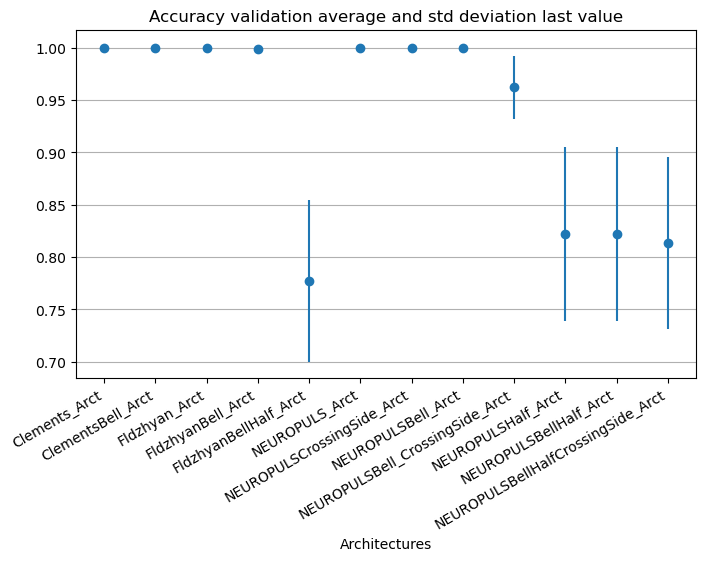

label  average_value  std_dev_value
0                        Clements_Arct       1.000000   3.411694e-08
1                    ClementsBell_Arct       1.000000   4.736435e-08
2                        Fldzhyan_Arct       0.999740   3.831547e-04
3                    FldzhyanBell_Arct       0.998950   3.191236e-03
4                FldzhyanBellHalf_Arct       0.777112   7.720710e-02
5                       NEUROPULS_Arct       1.000000   6.654099e-08
6           NEUROPULSCrossingSide_Arct       1.000000   4.050754e-08
7                   NEUROPULSBell_Arct       1.000000   2.677106e-08
8      NEUROPULSBell_CrossingSide_Arct       0.962085   2.974658e-02
9                   NEUROPULSHalf_Arct       0.822140   8.339098e-02
10              NEUROPULSBellHalf_Arct       0.822140   8.339099e-02
11  NEUROPULSBellHalfCrossingSide_Arct       0.813591   8.241563e-02

In [9]:
directory_run = 'outdata/20240603_test_result_fidelity'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct',
               'NEUROPULS_Arct', 'NEUROPULSCrossingSide_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell_CrossingSide_Arct',
               'NEUROPULSHalf_Arct', 'NEUROPULSBellHalf_Arct', 'NEUROPULSBellHalfCrossingSide_Arct']

ave_devstd_run = np.load(directory_run+'/run_ave_dev_save.npy', allow_pickle=True)
ave_devstd_df = pd.DataFrame(ave_devstd_run)
average = ave_devstd_df["average"].values
devstd = ave_devstd_df["std_dev"].values

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)

# plt.ylim([0.95, 1.05])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

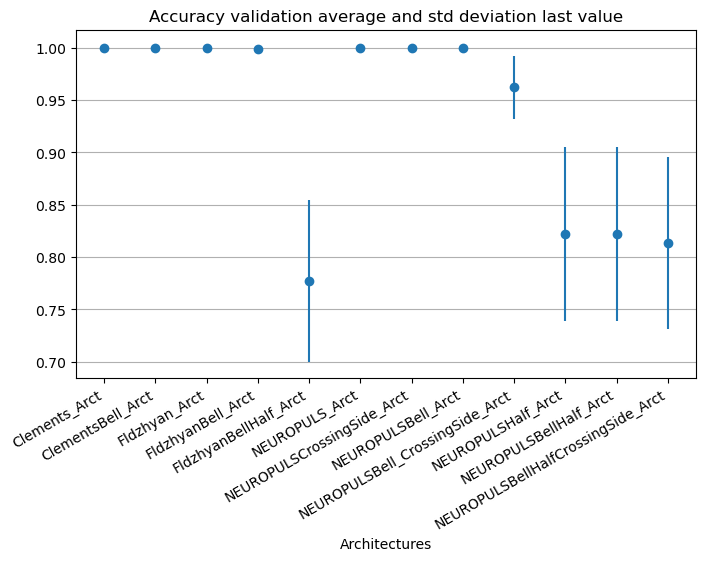

label  average_value  std_dev_value
0                        Clements_Arct       1.000000   3.411694e-08
1                    ClementsBell_Arct       1.000000   4.736435e-08
2                        Fldzhyan_Arct       0.999740   3.831547e-04
3                    FldzhyanBell_Arct       0.998950   3.191236e-03
4                FldzhyanBellHalf_Arct       0.777112   7.720710e-02
5                       NEUROPULS_Arct       1.000000   6.654099e-08
6           NEUROPULSCrossingSide_Arct       1.000000   4.050754e-08
7                   NEUROPULSBell_Arct       1.000000   2.677106e-08
8      NEUROPULSBell_CrossingSide_Arct       0.962085   2.974658e-02
9                   NEUROPULSHalf_Arct       0.822140   8.339098e-02
10              NEUROPULSBellHalf_Arct       0.822140   8.339099e-02
11  NEUROPULSBellHalfCrossingSide_Arct       0.813591   8.241563e-02

In [8]:
directory_run = 'outdata/20240607_test_Fidelity'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct',
               'NEUROPULS_Arct', 'NEUROPULSCrossingSide_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell_CrossingSide_Arct',
               'NEUROPULSHalf_Arct', 'NEUROPULSBellHalf_Arct', 'NEUROPULSBellHalfCrossingSide_Arct']

ave_devstd_run = np.load(directory_run+'/run_ave_dev_save.npy', allow_pickle=True)
ave_devstd_df = pd.DataFrame(ave_devstd_run)
average = ave_devstd_df["average"].values
devstd = ave_devstd_df["std_dev"].values

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)

# plt.ylim([0.95, 1.05])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

# Test how many file I'm taking shit

In [13]:
import os
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt


directory_run = 'outdata/20240612_fidelity_n4_iloss0.4/n4_iloss0.4_imb-0.1_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct',
               'NEUROPULS_Arct', 'NEUROPULSCrossingSide_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell_CrossingSide_Arct',
               'NEUROPULSHalf_Arct', 'NEUROPULSBellHalf_Arct', 'NEUROPULSBellHalfCrossingSide_Arct']


# Extract targets and preditions from the simulation directory folder
def extract_targets_preditions_1sim(directory):
    target_tuples = []
    predit_tuples = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)       # Construct the full file path
        if os.path.isfile(file_path):                       # Check if it is a file
            result_sim = np.load(file_path, allow_pickle=True)
            target_tuples.extend([(label, array) for label, array in result_sim if 'target' in label])
            predit_tuples.extend([(label, array) for label, array in result_sim if 'prediction' in label])
    return target_tuples, predit_tuples

def extract_unique_integers(strings):
    # Regular expression to find the integer after 'imatrix'
    pattern = r'imatrix(\d+)'
    unique_integers = set()
    for string in strings:
        match = re.search(pattern, string)
        if match:
            integer = int(match.group(1))
            unique_integers.add(integer)
    return list(unique_integers)


target_tuples, predit_tuples = extract_targets_preditions_1sim(directory_run)
# print(len(predit_tuples))

# print(predit_tuples)

def count_unique_strings_excluding_rep(strings):
    """
    Counts unique strings in the list excluding the `rep` integer part.

    Args:
        strings (list of str): List of strings to process.

    Returns:
        dict: Dictionary with the count of unique strings excluding the `rep` part.
    """
    from collections import defaultdict

    count_dict = defaultdict(int)
    
    for s in strings:
        # Split the string on '_rep' and take the part before it
        base_string = s.split('_rep')[0]
        count_dict[base_string] += 1
    
    return dict(count_dict)

for name in name_models:
    predit_tuples_filter = [tup for tup in predit_tuples if name in tup[0]]
    print(len(predit_tuples_filter))
    if "Clements_Arct" in name:
        imatrix_saved = extract_unique_integers([string_nmae[0] for string_nmae in predit_tuples_filter])
        result = count_unique_strings_excluding_rep([string_nmae[0] for string_nmae in predit_tuples_filter])
        print(result)
        print(list(result.values()))
        print(imatrix_saved)
        print("lensgh of the total number data: "+str(len(imatrix_saved)))

for vakue in list(result.values()):
    if vakue != 5:
        print("No buono")
print("BUONO BUONO")




5000
{'prediction_name_modelClements_Arct_nin4_imatrix0': 5, 'prediction_name_modelClements_Arct_nin4_imatrix1': 5, 'prediction_name_modelClements_Arct_nin4_imatrix2': 5, 'prediction_name_modelClements_Arct_nin4_imatrix3': 5, 'prediction_name_modelClements_Arct_nin4_imatrix4': 5, 'prediction_name_modelClements_Arct_nin4_imatrix5': 5, 'prediction_name_modelClements_Arct_nin4_imatrix6': 5, 'prediction_name_modelClements_Arct_nin4_imatrix7': 5, 'prediction_name_modelClements_Arct_nin4_imatrix8': 5, 'prediction_name_modelClements_Arct_nin4_imatrix21': 5, 'prediction_name_modelClements_Arct_nin4_imatrix22': 5, 'prediction_name_modelClements_Arct_nin4_imatrix23': 5, 'prediction_name_modelClements_Arct_nin4_imatrix24': 5, 'prediction_name_modelClements_Arct_nin4_imatrix25': 5, 'prediction_name_modelClements_Arct_nin4_imatrix26': 5, 'prediction_name_modelClements_Arct_nin4_imatrix27': 5, 'prediction_name_modelClements_Arct_nin4_imatrix28': 5, 'prediction_name_modelClements_Arct_nin4_imatrix29'

In [31]:
# Fidelity Data analysis

# import stuff
import os
import numpy as np
import re
import pandas as pd

# extract data of one simulation
def extract_targets_preditions_1sim(directory):
    target_tuples = []
    predit_tuples = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)       # Construct the full file path
        if os.path.isfile(file_path):                       # Check if it is a file
            result_sim = np.load(file_path, allow_pickle=True)
            target_tuples.extend([(label, array) for label, array in result_sim if 'target' in label])
            predit_tuples.extend([(label, array) for label, array in result_sim if 'prediction' in label])
    return target_tuples, predit_tuples

# derive Fidelity for the one simulation
# Compute Fidelity Unitary
def FidelityUnitary(target_matrix, predicted_matrix):
    target_matrix = np.array(target_matrix, dtype=np.complex128)
    predicted_matrix = np.array(predicted_matrix, dtype=np.complex128)
    trace_pH_p = np.trace(np.dot(predicted_matrix.conj().T, predicted_matrix)).real    # result is REAL
    trace_pH_t = np.trace(np.dot(predicted_matrix.conj().T, target_matrix))
    cosine_similarity = np.abs(trace_pH_t)**2/(target_matrix.shape[0]*trace_pH_p)
    return cosine_similarity

def remove_until_underscore(s):     # from the end until the first '_'
    parts = s.split('_')
    result = '_'.join(parts[1:])
    return result

def derive_Fidelity_1sim(target_tuples, predit_tuples):
    loss = []
    for i in range(len(target_tuples)):
        if remove_until_underscore(target_tuples[i][0]) == remove_until_underscore(predit_tuples[i][0]):
            loss.extend([FidelityUnitary(target_tuples[i][1], predit_tuples[i][1])])
        else:
            print("Capo abbiamo un problema :(")
    labels = [t[0] for t in predit_tuples]
    loss_pd = pd.DataFrame({'label': labels, 'value': loss})
    return loss_pd

# take max value and derive average and std dev
def models_repmax_mean_devstd(df, name_models, simulation_folder):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
    # Group with the base label and find max
    max_lastLoss_s = df.groupby('label_no_rep')['value'].max()

    averages = []
    std_devs = []
    for name in name_models:
        # model_s take the all 1000 sim same model with the best repetition value
        model_s = max_lastLoss_s[max_lastLoss_s.index.str.contains(name)]
        averages.append(model_s.mean())
        std_devs.append(model_s.std())
    
    # Extract and convert to float
    iloss_match = re.search(r"iloss(-?\d+\.\d+)", simulation_folder)
    imb_match = re.search(r"imb(-?\d+\.\d+)", simulation_folder)
    iloss = float(iloss_match.group(1)) if iloss_match else None
    imb = float(imb_match.group(1)) if imb_match else None
    ave_std_dev_pd = pd.DataFrame({'simulation':simulation_folder, 'name_model': name_models,
                                   'average': averages, 'std_dev': std_devs,
                                   'iloss': iloss, 'imb': imb,})
    return ave_std_dev_pd


# =================================================================================================================
# MAIN
# =================================================================================================================
directory_run = 'outdata/20240610_PROB_Fidelity'
name_models = [
    'Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
    'FldzhyanBellHalf_Arct',
    'NEUROPULS_Arct', 'NEUROPULSCrossingSide_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell_CrossingSide_Arct',
    'NEUROPULSHalf_Arct', 'NEUROPULSBellHalf_Arct', 'NEUROPULSBellHalfCrossingSide_Arct']

data_df = pd.DataFrame()
for filename in os.listdir(directory_run):
    directory_path = os.path.join(directory_run, filename)       # Construct the full file path
    if "n"+str(4) in directory_path:     # take the n I wanted
        if not os.path.isfile(directory_path):
            target_tuples, predit_tuples = extract_targets_preditions_1sim(directory_path)
            mse_pd = derive_Fidelity_1sim(target_tuples, predit_tuples)
            simulation_folder = os.path.basename(directory_path)
            ave_std_dev_pd = models_repmax_mean_devstd(mse_pd, name_models, simulation_folder)
            data_df = pd.concat([data_df, ave_std_dev_pd], ignore_index=True)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


KeyboardInterrupt: 

In [6]:
import numpy as np
from scipy.stats import unitary_group

seed = 37
np.random.seed(seed)

def average_modulus_unitary_matrices(num_matrices: int, matrix_size: int):
    total_sum = np.zeros((matrix_size, matrix_size))
    for _ in range(num_matrices):
        # Generate a random unitary matrix
        U = unitary_group.rvs(matrix_size)
        # Add the modulus of each element to the total sum
        total_sum += np.abs(U)**2

    
    # Compute the average modulus
    average_modulus = total_sum / num_matrices
    return average_modulus

# Generate 1000 random 4x4 unitary matrices
num_matrices = 1000
matrix_size = 4
average_modulus = average_modulus_unitary_matrices(num_matrices, matrix_size)

print("Average modulus of each element in the unitary matrices:")
print(average_modulus)

Average modulus of each element in the unitary matrices:
[[0.12404093 0.12336722 0.12580796 0.12594925 0.12369928 0.12736657
  0.12710739 0.12266139]
 [0.12932657 0.1265768  0.12450704 0.12410678 0.11783945 0.12253728
  0.12362469 0.13148139]
 [0.12225079 0.12781845 0.12411713 0.12796276 0.12776102 0.12518388
  0.12194729 0.12295867]
 [0.12252631 0.13035095 0.12584837 0.12258785 0.12506581 0.12922725
  0.1236293  0.12076416]
 [0.12529794 0.12042091 0.12525465 0.12517337 0.1251013  0.12879956
  0.12097755 0.12897473]
 [0.12590305 0.12938949 0.12299524 0.12342174 0.12730327 0.12192983
  0.13159626 0.11746112]
 [0.12190787 0.12349082 0.12880387 0.1228605  0.12622962 0.12631347
  0.12545654 0.12493731]
 [0.12874654 0.11858536 0.12266574 0.12793776 0.12700024 0.11864215
  0.12566097 0.13076124]]
